In [1]:
# Import libraries needed,
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode

In [3]:
#Loading the data using pandas
dataset=pd.read_csv(r'C:\Users\satvi\Downloads\readmission.csv')

In [4]:
#Exploring the data further
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
dataset[:10]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#Dealing with missing values
df = dataset.copy() 
Rep = df.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
#Dropping "Weight,payer_code and medical_specialty" as they have too many missing values, it would be best to remove these.
df= df.drop(['weight','payer_code','medical_specialty'],axis=1)

In [9]:
df[:5]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [13]:
#We can see we have 3 types of values 'NO','>30','<30'.
df['30 readmitted'] = np.where(df['readmitted'] == 'NO', 0, 1)

In [14]:
df.groupby('30 readmitted').size()

30 readmitted
0    54864
1    46902
dtype: int64

In [15]:
# Removing the pateints from the dataset that are dead.
df = df[((df.discharge_disposition_id != 11)&(df.discharge_disposition_id != 13)&(df.discharge_disposition_id != 14)&
         (df.discharge_disposition_id != 19)&(df.discharge_disposition_id != 20)&(df.discharge_disposition_id != 21))]

In [16]:
df[:10]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30 readmit,30 readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,NO,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,Yes,NO,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,No,Ch,Yes,NO,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,No,Ch,Yes,NO,0,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,No,No,Yes,>30,1,1
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,No,No,No,No,Ch,Yes,NO,0,0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,Yes,>30,1,1
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,No,No,No,No,Ch,Yes,NO,0,0
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,No,No,No,No,Ch,Yes,NO,0,0


In [17]:
df= df.drop(['30 readmit'],axis=1)

In [18]:
df[:20]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30 readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,Steady,No,No,No,No,No,No,Yes,>30,1
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,Yes,>30,1
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [20]:
import seaborn as sns

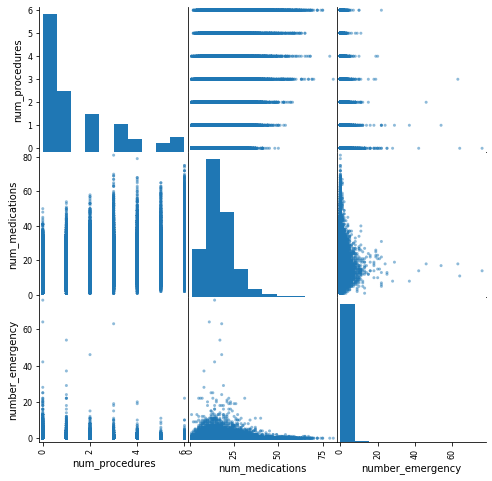

In [25]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between two variables then we can consider one of them.
sm =pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

In [26]:
# we can see that there is no problem of multi-collinearity

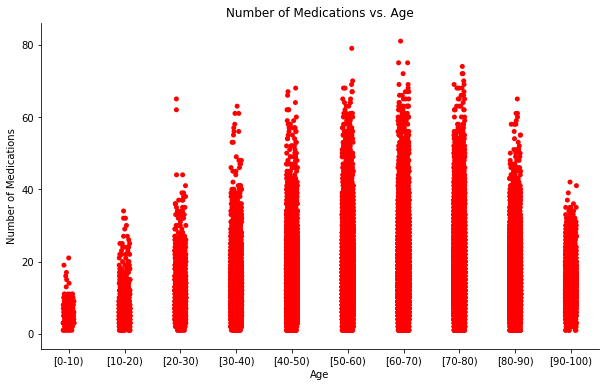

In [27]:
#Let's try to see how the age and number of medicines vary
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine()
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

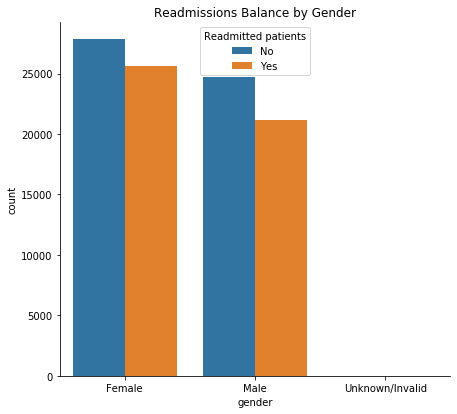

In [29]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '30 readmitted', data = df) 
sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

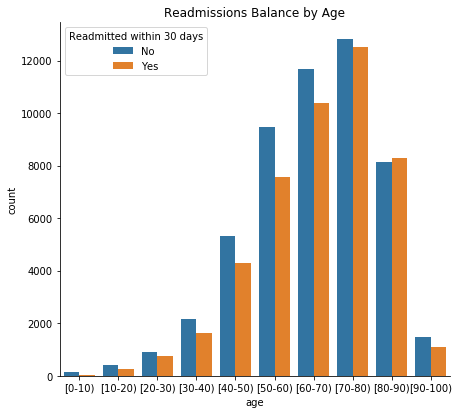

In [30]:
#Relation between age and readmission,
b = df.age.unique()
b.sort()
b_sort = np.array(b).tolist()
ageplt = sns.countplot(x = 'age', hue = '30 readmitted', data = df, order = b_sort) 
sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

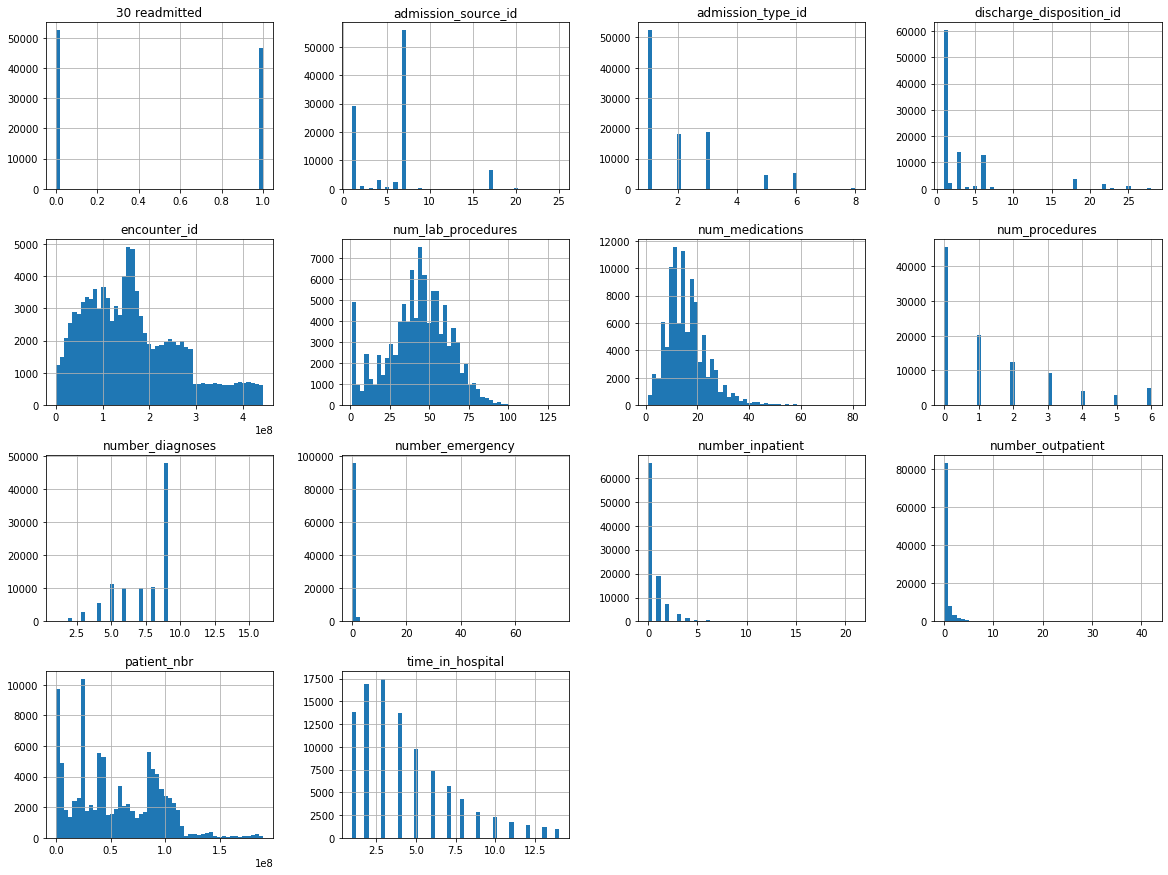

In [32]:
#Plotting the numerical variables in our dataset,
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

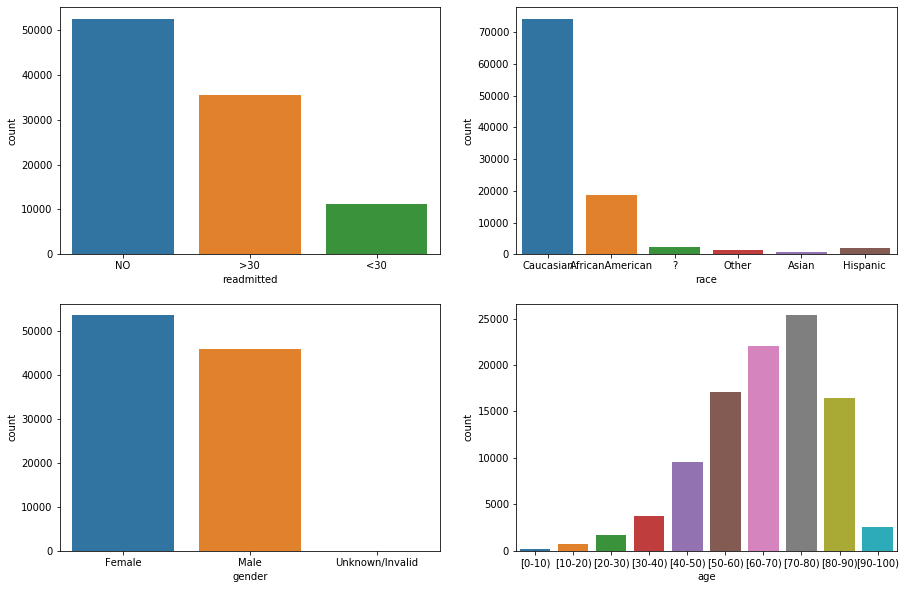

In [33]:
#Exploring the categorical variables
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

In [35]:
#Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown
numcolumn = df.select_dtypes(include = [np.number]).columns
objcolumn = df.select_dtypes(include = ['object']).columns
df[numcolumn] = df[numcolumn].fillna(0)
df[objcolumn] = df[objcolumn].fillna("unknown")

In [36]:
#Encoding the data
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
def codemap(df, codes):
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp    
    return df 
listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
df[listcol] = codemap(df[listcol], codes)

C:\Users\satvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [38]:
#Now let's look at the dataset again and drop the irrelevant columns
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender       age  \
0            2278392      8222157        Caucasian  Female    [0-10)   
1             149190     55629189        Caucasian  Female   [10-20)   
2              64410     86047875  AfricanAmerican  Female   [20-30)   
3             500364     82442376        Caucasian    Male   [30-40)   
4              16680     42519267        Caucasian    Male   [40-50)   
5              35754     82637451        Caucasian    Male   [50-60)   
6              55842     84259809        Caucasian    Male   [60-70)   
7              63768    114882984        Caucasian    Male   [70-80)   
8              12522     48330783        Caucasian  Female   [80-90)   
9              15738     63555939        Caucasian  Female  [90-100)   
10             28236     89869032  AfricanAmerican  Female   [40-50)   
11             36900     77391171  AfricanAmerican    Male   [60-70)   
12             40926     85504

In [39]:
d1 = df.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [40]:
#Normalization of the data
from sklearn.preprocessing import StandardScaler
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
normal = StandardScaler()
d1[listnormal] = normal.fit_transform(d1[listnormal])
d1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30 readmitted
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,1.874346e-14,-3.424256e-15,3.449070e-15,-1.776343e-15,1.182191e-13,6.322393e-14,-1.499301e-15,-9.426101e-14,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [42]:
#Let's store readmitted in y and rest of the columns in X
Y = d1['30 readmitted']
X = d1.drop(['30 readmitted'], axis =1)
X = pd.get_dummies(X)

In [43]:
#Splitting the data into training and vallidation data sets. 
#The training data will contain 80 % of the data and validation will contain remaining 20%

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2,random_state = 7, stratify = Y)
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


# Logistic Regression

In [46]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

C:\Users\satvi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6277115103930746


In [48]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8376 2130]
 [5267 4096]]


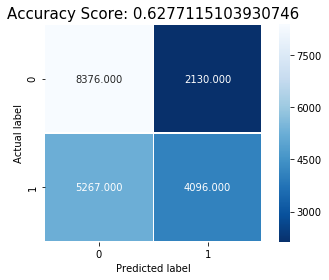

In [49]:
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [50]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [51]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

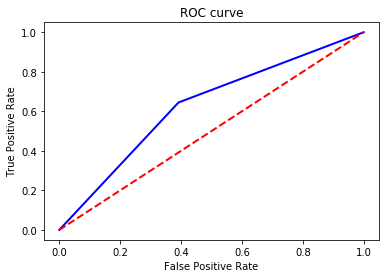

In [52]:
#Computing false and true positive rates
from sklearn.metrics import roc_curve
fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [53]:
#Lets try some other models

## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [55]:
#Calculating the score
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [56]:
#Checking the accuracy,
print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6369721676984247


In [57]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7552 2954]
 [4259 5104]]


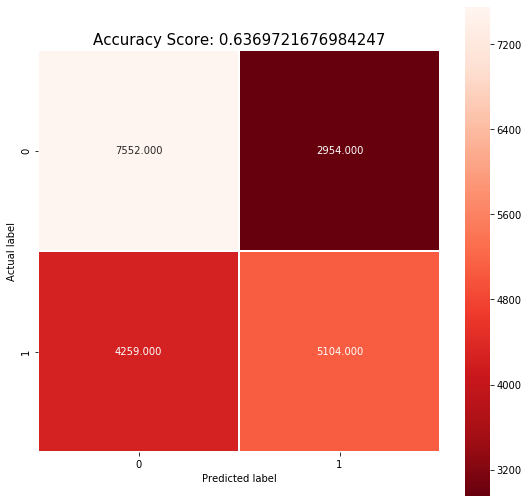

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [59]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.72      0.68     10506
         YES       0.63      0.55      0.59      9363

    accuracy                           0.64     19869
   macro avg       0.64      0.63      0.63     19869
weighted avg       0.64      0.64      0.63     19869



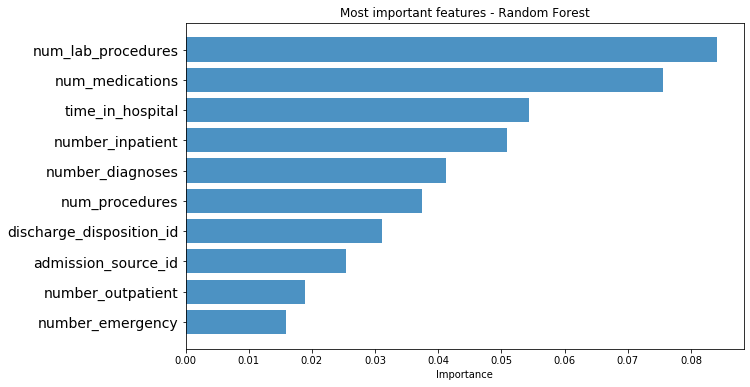

In [60]:
#Determining which features are most important
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# AdaBoosted Classification model

In [62]:
#Creating a AdaBoosted Classification model
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(Xtrain, Ytrain)
yadaclas = adaclass.predict(Xtest)
print("The accurary of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6254466757260053


In [63]:
#Checking the confusion matrix,
print(confusion_matrix(Ytest, yadaclas))

[[8328 2178]
 [5264 4099]]


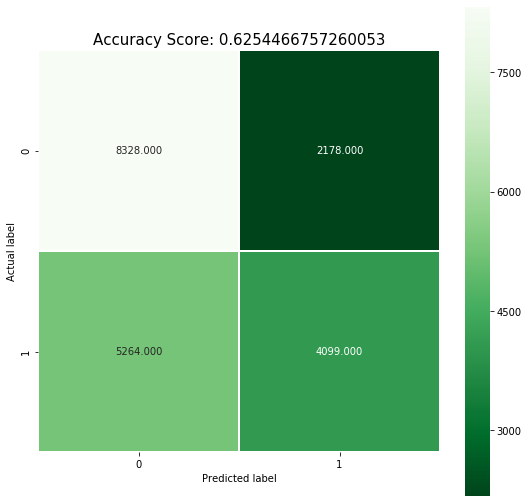

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

# Decision tree

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [78]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [79]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [80]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


# Comparing the models

In [82]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Ytest, yadaclas)#Ada boost classifier
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )

C:\Users\satvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'True Positive Rate')

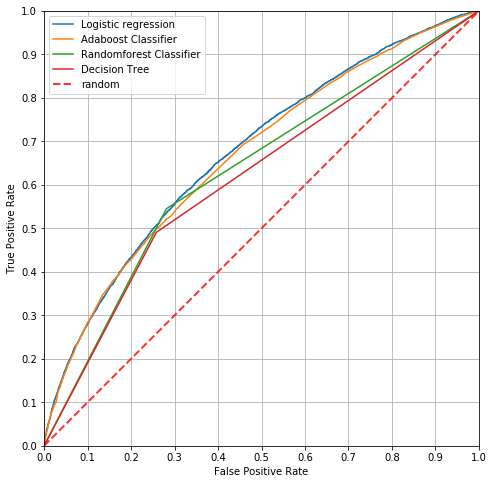

In [84]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [85]:
print(" Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

 Accuracy of Logistic regression model: 62.77115103930746
Accuracy of Random forest classification:  63.69721676984247
Accuracy of AdaBoosted Classification model:  62.54466757260053
Accuracy of Decision Tree  62.358447833308176


# Summary

###### From the above we can see that the accuracy levels of AdaBoost after tuning and Random forest is among the best, about 64%.
###### The accuracy of all the models are similar and ranges between 62-64%. Further, applying more pre-processing techniques might help. The dataset needs more data cleaning and data fitting to achieve a higher degree of accuracy.
###### The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different models.